In [ ]:
!git clone https://github.com/arshjot/ScrabbleGAN.git

Cloning into 'ScrabbleGAN'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 208 (delta 89), reused 173 (delta 57), pack-reused 0
Receiving objects: 100% (208/208), 202.94 KiB | 5.64 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from config import Config
import pickle as pkl
from generate_images import ImgGenerator
import matplotlib.pyplot as plt
import torch
import numpy as np

In [ ]:
config = Config

In [ ]:
config.lexicon_file = '/content/drive/MyDrive/words_russian_5000.txt'

In [ ]:
config.num_chars = 166

In [ ]:
with open('/content/drive/MyDrive/char_map_russian_RIMES_tr_data.pkl', 'rb') as f:
   char_map = pkl.load(f)

In [ ]:
config.num_chars

166

In [ ]:
generator = ImgGenerator(checkpt_path='/content/drive/MyDrive/model_checkpoint_epoch_344.pth.tar',
                         config=config, char_map=char_map)

Model: ScrabbleGAN
Param count for Gs initialized parameters: 46073729
Param count for Ds initialized parameters: 36457793


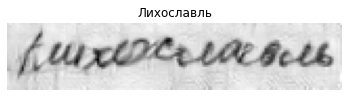

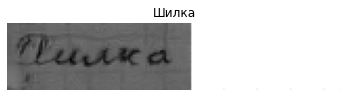

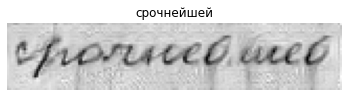

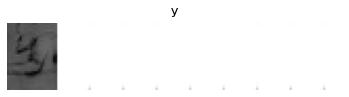

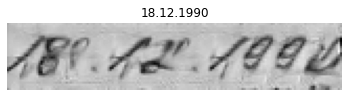

In [ ]:
num_imgs = 5
generated_imgs, _, word_labels = generator.generate(random_num_imgs=num_imgs)
for label, img in zip(word_labels, generated_imgs):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

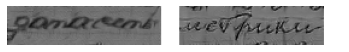

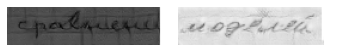

In [ ]:
sentences = [['датасеты', 'метрики'], ['сравнени', 'моделей']]

for word_list in sentences:
    generated_imgs, _, word_labels = generator.generate(word_list=word_list)
    sentence_img = []
    for label, img in zip(word_labels, generated_imgs):
        img = img[:, img.sum(0) < 31.5]
        sentence_img.append(img)
        sentence_img.append(np.ones((img.shape[0], 15)))
    sentence_img = np.hstack(sentence_img)
    plt.imshow(sentence_img, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
z_dist = torch.distributions.Normal(loc=0, scale=1.)

In [ ]:
#@title Seed для стиля
noise_seed = 42 #@param {type:"slider", min:0, max:100, step:1}

torch.manual_seed(noise_seed)
z = z_dist.sample([128])

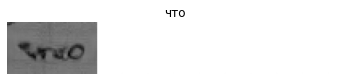

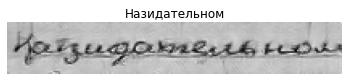

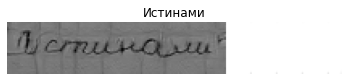

In [ ]:
num_imgs = 3
generated_imgs, _, word_labels = generator.generate(random_num_imgs=num_imgs, z=z)
for label, img in zip(word_labels, generated_imgs):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

In [ ]:
noise_seed = 51 #@param {type:"slider", min:0, max:100, step:1}

torch.manual_seed(noise_seed)
z = z_dist.sample([128])

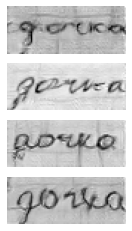

In [ ]:
word = 'дочка'
num_samples = 4
generated_imgs, _, word_labels = generator.generate(word_list=[word] * num_samples, z=z)
columns = 1
rows = num_samples
fig=plt.figure()
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(generated_imgs[i-1], cmap='gray')
plt.show()